# Mutual information

A la hora de analizar un dataset, un buen primer paso es construir un ranking sobre que features son más útiles a la hora de predecir el target. 

La métrica que se utiliza es la **mutual information** (o información mútua). La **mutual information (MI)** es muy parecida a la correlación, ya que mide una relación entre dos cantidades. La ventaja de la mutual information es que puede detectar cualquier tipo de relación, mientras que la correlación sólo detecta relaciones lineales.

Es una grán métrica para caracterizar el dataset ya que es:
- Facil de interpretar
- Computacionalmente eficiente
- Está fundamentada teóricamente
- Robusta al overfitting
- Capaz de detectar cualquier tipo de relación

La mutual information describe las relaciones en términos de incertidumbre. La MI entre dos variables es una medida de cuanto el conocimiento de una variable reduce la incertidumbre de la otra. Si conocieras el valor de una feature, ¿cuánto más seguro estarías sobre el target?. En términos de teoría de la información, si mido la información mútua entre las variables A y B, me está diciendo cuanta información sobre la variable A me otorga el hecho de conocer la variable B. En este caso, utilizaremos esta relación para saber cuanta información me otorga cada feature sobre el target que estoy buscando.

La MI puede ayudarle a comprender el potencial relativo de una feature como predictor del objetivo, considerada por sí misma. 

Es posible que una feature sea muy informativa cuando interactúa con otras características, pero no tan informativa por sí sola. La MI no puede detectar interacciones entre features.

La utilidad real de una feature depende del modelo con el que se utilice. Una feature sólo es útil en la medida en que su relación con el target sea una que su modelo pueda aprender. El hecho de que una característica tenga una puntuación alta de MI no significa que su modelo pueda hacer algo con esa información.

### Ejemplo: 1985 Automobile dataset

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("datasets/automobile_1985_dataset.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


La función de Scikit-Learn para calcular la MI opera de forma distinta las features categóricas de las features numéricas. Por lo general, a las features categóricas se les hace un proceso de label encoding.

In [13]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


Scikit-learn tiene dos métricas de MI en su módulo feature_selection: una para targets numéricos continuos (mutual_info_regression) y otra para targets categóricos (mutual_info_classif). Nuestro objetivo, el precio, es de del tipo numérico continuo. La siguiente celda calcula las puntuaciones del MI para nuestras features.

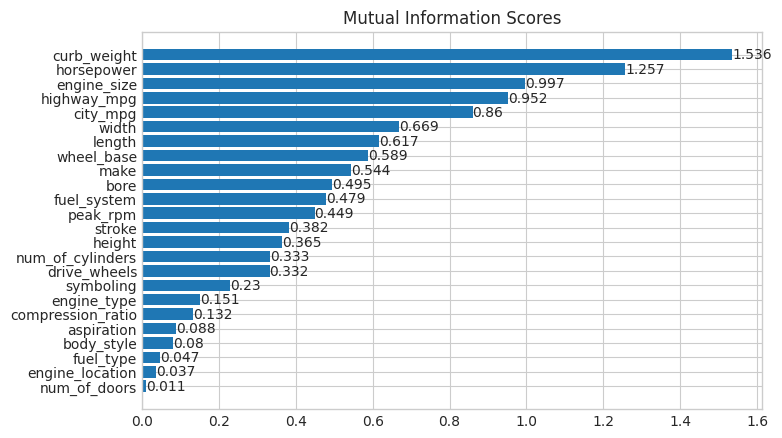

In [27]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = round(scores.sort_values(ascending=True),3)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    fig, ax = plt.subplots(dpi=100, figsize=(8, 5))
    bars = plt.barh(width, scores)
    ax.bar_label(bars)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plot_mi_scores(mi_scores)

La visualización de los scores y de la relación de las features con el target es una buena práctica. A continuación se analiza la relación entre el target `price` con `curb_weight` y `height`.

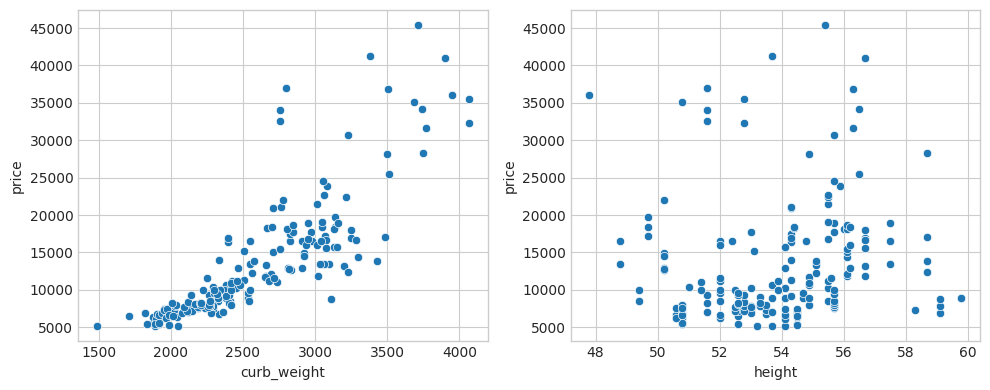

In [56]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (10,4), dpi = 100)
sns.scatterplot(x="curb_weight", y="price", data=df, ax = axes[0])
sns.scatterplot(x="height", y="price", data=df, ax = axes[1])
plt.tight_layout()

Se ve que hay una cierta relación entre `curb_weight` y `price` que no necesariamente tiene que ser lineal. En cambio analizando la feature `height` no es posible encontrar a priori una relación con `price`, lo cual tiene sentido, ya que la altura de un vehiculo no está estrictamente relacionada con su precio

La feature `fuel_type` tiene un MI bajo, pero si se relaciona con `horsepower`, separa claramente dos poblaciones de `price` con tendencias distintas dentro de la feature `horsepower`, como se ve a continuación

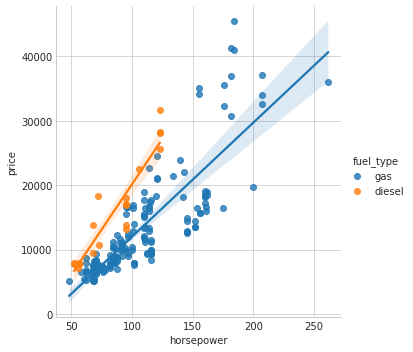

In [45]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df)

Por eso es importante tener conocimiento en el campo que se está desarrollando, y no guiarse estrictamente por métricas, como lo es la información mútua. Aqui se ve una de las debilidades de esta métrica, ya que, como se menciono en el comienzo, unicamente analiza la información mutua entre cada feature por separado con el target, y no mesura la relación entre features.